<h1><center>CSEN1022:Assignment 1</center></h1>
<h3><center>Winter 2021</center></h3>
<hr style="border:2px solid black"> </hr>

## <u> Please don't forget to fill in this data </u>
**Member 1**

Name: Karim Ebrahim

GUC-ID: 43-0414

Elective Tutorial No.: T-011

**Member 2**

Name: Shadi Nakhla

GUC-ID: 43-411

Elective Tutorial No.: T-011

<hr style="border:2px solid black"> </hr>

## Imports (Don't Edit)

In [2]:
# ONLY USE THESE IMPORTS.
# PLEASE DON'T EDIT THIS CELL.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
!unzip Data.zip

## Read Data (Edit)

In [3]:
def fillMatrixNormalized (type):
  matrix = np.array([plt.imread('Data/train/'+type+"/" +str(i)+'.jpg').reshape(-1) for i in range (0,5000)])
    
  matrix = np.true_divide(matrix, 255)
  return(matrix)
def fillMatrixNormalizedGray (type, size):
  matrix = np.array([plt.imread('Data/train/'+type+"/" +str(i)+'.jpg').reshape(-1) for i in range (0,5000)])
    
  matrix = np.true_divide(matrix, 255) 
  matrix2= np.empty([size,1024])
  for i in range(0,size):
    for j in range (0,3072,3):
      matrix2[i][j//3] = (matrix[i][j]*0.3) + (matrix[i][j+1]*0.59)  + (matrix[i][j+2]*0.11)
  return(matrix2)

def test (type):
  matrix = np.array([plt.imread('Data/test/'+type+"/" +str(i)+'.jpg').reshape(-1) for i in range (0,1000)])
    
  return(matrix)
def testGray (type):
  matrix = np.array([plt.imread('Data/test/'+type+"/" +str(i)+'.jpg').reshape(-1) for i in range (0,1000)])
    
  matrix = np.true_divide(matrix, 255) 
  matrix2= np.empty([1000,1024])
  for i in range(0,1000):
    for j in range (0,3072,3):
      matrix2[i][j//3] = (matrix[i][j]*0.3) + (matrix[i][j+1]*0.59)  + (matrix[i][j+2]*0.11)
  return(matrix2)
def fillMatrixNormalizedNot (type1,type2):
  matrix = np.zeros(shape=(10000,3072))

  for i in range(0,5000):
    matrix[i] = np.array([plt.imread("Data/train/"+type1+"/"+str(i)+".jpg").reshape(-1)])
    matrix[i+5000] = np.array([plt.imread("Data/train/"+type2+"/"+str(i)+".jpg").reshape(-1)])
  matrix = np.true_divide(matrix, 255)
  return(matrix)
def meanCalculator (matrix):
  return(matrix.mean(axis=0))
def calculateSw(filledMatrix,m_a):
  vertex = (filledMatrix - m_a)
  sw_a = vertex.T @ vertex
  return(sw_a)

filledMatrixA = (fillMatrixNormalized("airplane"))
filledMatrixF = (fillMatrixNormalized("frog"))
filledMatrixM = (fillMatrixNormalized("automobile"))
filledMatrixNotA = np.concatenate((filledMatrixM,filledMatrixF), axis=0)
filledMatrixNotF = np.concatenate((filledMatrixA, filledMatrixM), axis=0)
filledMatrixNotM = np.concatenate((filledMatrixA, filledMatrixF), axis=0)
filledMatrixAGray = (fillMatrixNormalizedGray("airplane",5000))
filledMatrixFGray = (fillMatrixNormalizedGray("frog",5000))
filledMatrixMGray = (fillMatrixNormalizedGray("automobile",5000))
filledMatrixNotAGray = np.concatenate((filledMatrixFGray, filledMatrixMGray), axis=0)
filledMatrixNotFGray = np.concatenate((filledMatrixAGray, filledMatrixMGray), axis=0)
filledMatrixNotMGray = np.concatenate((filledMatrixAGray, filledMatrixFGray), axis=0)


<hr style="border:2px solid black"> </hr>

## Construct Fischer's Linear Discriminant classifier for each of the 3 classes.
#### Test each classifier on all images in X_Test. 
#### Construct Confusion Matrix.

In [4]:
# Write code here
# Train
# Test
# confusion_matrix = 
m_a = (meanCalculator(filledMatrixA))
sw_a = calculateSw(filledMatrixA,m_a)
m_not_a = meanCalculator(filledMatrixNotA)
sw_not_a = calculateSw(filledMatrixNotA, m_not_a)
swAir = sw_a + sw_not_a
swAirInv = np.linalg.pinv(swAir)
C_air = swAirInv @ (m_a - m_not_a)
C_airTranspose = np.transpose(C_air)
wNodeAirClassifier = C_airTranspose @ (-0.5*(m_a + m_not_a))
m_f = (meanCalculator(filledMatrixF))
sw_f = calculateSw(filledMatrixF,m_f)
m_not_f = meanCalculator(filledMatrixNotF)
sw_not_f = calculateSw(filledMatrixNotF, m_not_f)
swFrog = sw_f + sw_not_f
swFrogInv = np.linalg.pinv(swFrog)
C_frog = swFrogInv @ (m_f - m_not_f)
wNodeFrogClassifier = C_frog.transpose() @ (-0.5*(m_f + m_not_f))
m_m = (meanCalculator(filledMatrixM))
sw_m = calculateSw(filledMatrixM,m_m)
m_not_m = meanCalculator(filledMatrixNotM)
sw_not_m = calculateSw(filledMatrixNotM, m_not_m)
swCar = sw_m + sw_not_m
swCarInv = np.linalg.pinv(swCar)
C_car = swCarInv @ (m_m - m_not_m)
wNodeCarClassifier = C_car.transpose() @ (-0.5*(m_m + m_not_m))

confusion_matrix = [[],[],[]]
aCount = 0
fCount = 0
cCount = 0
type = 'airplane'
matrix = np.array([plt.imread('Data/test/'+type+"/" +str(i)+'.jpg').reshape(-1) for i in range (0,1000)])
matrix = np.true_divide(matrix, 255)
for i in matrix:
  aValue = C_air.transpose()@ i + wNodeAirClassifier
  fValue = C_frog.transpose()@ i + wNodeFrogClassifier
  cValue = C_car.transpose()@ i + wNodeCarClassifier
  arr = [aValue , fValue , cValue]
  max = np.max(arr)
  if(max == aValue):
    aCount+=1
  if(max == fValue):
    fCount+=1
  if(max == cValue):
    cCount+=1
confusion_matrix[0] = [aCount, fCount, cCount] 

aCount = 0
fCount = 0
cCount = 0
type = 'frog'
matrix = np.array([plt.imread('Data/test/'+type+"/" +str(i)+'.jpg').reshape(-1) for i in range (0,1000)])
matrix = np.true_divide(matrix, 255)
for i in matrix:
  aValue = C_air.transpose()@ i + wNodeAirClassifier
  fValue = C_frog.transpose()@ i + wNodeFrogClassifier
  cValue = C_car.transpose()@ i + wNodeCarClassifier
  arr = [aValue , fValue , cValue]
  max = np.max(arr)
  if(max == aValue):
    aCount+=1
  if(max == fValue):
    fCount+=1
  if(max == cValue):
    cCount+=1
confusion_matrix[1] = [aCount, fCount, cCount] 

aCount = 0
fCount = 0
cCount = 0
type = 'automobile'
matrix = np.array([plt.imread('Data/test/'+type+"/" +str(i)+'.jpg').reshape(-1) for i in range (0,1000)])
matrix = np.true_divide(matrix, 255)
for i in matrix:
  aValue = C_air.transpose()@ i + wNodeAirClassifier
  fValue = C_frog.transpose() @ i + wNodeFrogClassifier
  cValue = C_car.transpose() @ i + wNodeCarClassifier
  arr = [aValue , fValue , cValue]
  max = np.max(arr)
  if(max == aValue):
    aCount+=1
  if(max == fValue):
    fCount+=1
  if(max == cValue):
    cCount+=1
confusion_matrix[2] = [aCount, fCount, cCount]
confusion_matrix = np.array(confusion_matrix)
X_test = np.concatenate((test("airplane"),test("frog"),test("automobile")),axis=0)
X_test = np.true_divide(X_test, 255)
print(confusion_matrix)

[[760  96 144]
 [ 78 788 134]
 [201 145 654]]


## Confusion Matrix (Don't Edit)

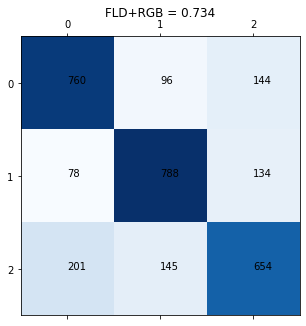

In [5]:
# Make sure the previous cell returns a variable called confusion_matrix
# Plot Confusion Matrix
accuracy = np.diag(confusion_matrix).sum()/X_test.shape[0]
plt.rc('figure', figsize=[5,5])
plt.matshow(confusion_matrix,cmap="Blues")
plt.title('FLD+RGB = {0:0.3f}'.format(accuracy))
for i in range(0,confusion_matrix.shape[0]):
    for j in range(0,confusion_matrix.shape[1]):
        plt.annotate(confusion_matrix[i,j],(j,i))

### Repeat for Grayscale

In [6]:
# Write code here
# Train
# Test
# confusion_matrix = 
m_aGray = (meanCalculator(filledMatrixAGray))
sw_aGray = calculateSw(filledMatrixAGray,m_aGray)
m_not_aGray = meanCalculator(filledMatrixNotAGray)
sw_not_aGray = calculateSw(filledMatrixNotAGray, m_not_aGray)
swAirGray = sw_aGray + sw_not_aGray
swAirInvGray = np.linalg.pinv(swAirGray)
C_airGray = swAirInvGray @ (m_aGray - m_not_aGray)
C_airTransposeGray = np.transpose(C_airGray)
wNodeAirClassifierGray = C_airTransposeGray @ (-0.5*(m_aGray + m_not_aGray))
m_fGray = (meanCalculator(filledMatrixFGray))
sw_fGray = calculateSw(filledMatrixFGray,m_fGray)
m_not_fGray = meanCalculator(filledMatrixNotFGray)
sw_not_fGray = calculateSw(filledMatrixNotFGray, m_not_fGray)
swFrogGray = sw_fGray + sw_not_fGray
swFrogInvGray = np.linalg.pinv(swFrogGray)
C_frogGray = swFrogInvGray @ (m_fGray - m_not_fGray)
C_frogTransposeGray = np.transpose(C_frogGray)
wNodeFrogClassifierGray = C_frogTransposeGray @ (-0.5*(m_fGray + m_not_fGray))
m_mGray = (meanCalculator(filledMatrixMGray))
sw_mGray = calculateSw(filledMatrixMGray,m_mGray)
m_not_mGray = meanCalculator(filledMatrixNotMGray)
sw_not_mGray = calculateSw(filledMatrixNotMGray, m_not_mGray)
swCarGray = sw_mGray + sw_not_mGray
swCarInvGray = np.linalg.pinv(swCarGray)
C_carGray = swCarInvGray @ (m_mGray - m_not_mGray)
C_carTransposeGray = np.transpose(C_carGray)
wNodeCarClassifierGray = C_carTransposeGray @ (-0.5*(m_mGray + m_not_mGray))

confusion_matrix = [[],[],[]]
aCountGray = 0
fCountGray = 0
cCountGray = 0
matrix = testGray("airplane")

for i in matrix:
  
  aValueGray = C_airGray.transpose()@ i + wNodeAirClassifierGray
  fValueGray = C_frogGray.transpose()@ i + wNodeFrogClassifierGray
  cValueGray = C_carGray.transpose()@ i + wNodeCarClassifierGray
  arrGray = [aValueGray , fValueGray , cValueGray]
  maxGray = np.max(arrGray)
  if(maxGray == aValueGray):
    aCountGray+=1
  if(maxGray == fValueGray):
    fCountGray+=1
  if(maxGray == cValueGray):
    cCountGray+=1
confusion_matrix[0] = [aCountGray, fCountGray, cCountGray] 

aCountGray = 0
fCountGray = 0
cCountGray = 0
matrix = testGray("frog")

for i in matrix:
  aValueGray = C_airGray.transpose()@ i + wNodeAirClassifierGray
  fValueGray = C_frogGray.transpose()@ i + wNodeFrogClassifierGray
  cValueGray = C_carGray.transpose()@i  + wNodeCarClassifierGray
  arrGray = [aValueGray , fValueGray , cValueGray]
  maxGray = np.max(arrGray)
  if(maxGray == aValueGray):
    aCountGray+=1
  if(maxGray == fValueGray):
    fCountGray+=1
  if(maxGray == cValueGray):
    cCountGray+=1
confusion_matrix[1] = [aCountGray, fCountGray, cCountGray] 

aCountGray = 0
fCountGray = 0
cCountGray = 0
matrix = testGray("automobile")

for i in matrix:
  aValueGray = C_airGray.transpose()@ i + wNodeAirClassifierGray
  fValueGray = C_frogGray.transpose()@ i + wNodeFrogClassifierGray
  cValueGray = C_carGray.transpose()@ i + wNodeCarClassifierGray
  arrGray = [aValueGray , fValueGray , cValueGray]
  maxGray = np.max(arrGray)
  if(maxGray == aValueGray):
    aCountGray+=1
  if(maxGray == fValueGray):
    fCountGray+=1
  if(maxGray == cValueGray):
    cCountGray+=1
confusion_matrix[2] = [aCountGray, fCountGray, cCountGray]
confusion_matrix = np.array(confusion_matrix)
X_testGray = np.concatenate((testGray("airplane"),testGray("frog"),testGray("automobile")),axis=0)
X_testGray = np.true_divide(X_testGray, 255)
print(confusion_matrix)

[[673 194 133]
 [229 538 233]
 [175 234 591]]


## Confusion Matrix (Don't Edit)

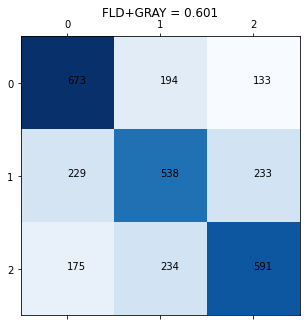

In [7]:
# Make sure the previous cell returns a variable called confusion_matrix
# Plot Confusion Matrix
accuracy = np.diag(confusion_matrix).sum()/X_test.shape[0]
plt.rc('figure', figsize=[5,5])
plt.matshow(confusion_matrix,cmap="Blues")
plt.title('FLD+GRAY = {0:0.3f}'.format(accuracy))
for i in range(0,confusion_matrix.shape[0]):
    for j in range(0,confusion_matrix.shape[1]):
        plt.annotate(confusion_matrix[i,j],(j,i))

<hr style="border:2px solid black"> </hr>

## Comment on the change of accuracy between RGB and Grayscale
##########

Write Comment Here

The accuarcy of the detection of the classifiers is higher when using RGB than when using gray scale which makes sense as when the images are converted to gray scale every pixel that had 3 values (RGB) now only has one value that is aproximating the RGB values this leads to less info and less weights for the classifiers in this case resulting in lower accuracy in detection when using gray scale than when using RGB images.
##########
<hr style="border:2px solid black"> </hr>